<a href="https://colab.research.google.com/github/seuha516/MachineLearningPractice/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**비지도 학습**

##Clustering Algorithm

###Data

In [119]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-03-21 12:19:57--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-21 12:19:57--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-21 12:19:57--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443..

In [120]:
import numpy as np
import matplotlib.pyplot as plt

fruits=np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [121]:
#첫 번째 이미지의 첫 번째 행
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


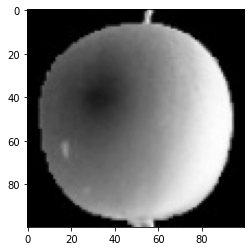

In [122]:
#이미지 보기
plt.imshow(fruits[0],cmap='gray')
plt.show()

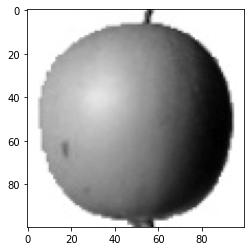

In [123]:
plt.imshow(fruits[0],cmap='gray_r')
plt.show()

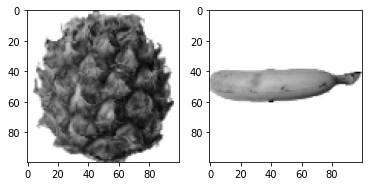

In [124]:
fig,axs=plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

###Sort

####Mean(Sample)

In [125]:
apple=fruits[0:100].reshape(-1,100*100)
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1,100*100)

In [126]:
print(apple.shape)

(100, 10000)


In [127]:
#사과 각 사진의 픽셀 평균값
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


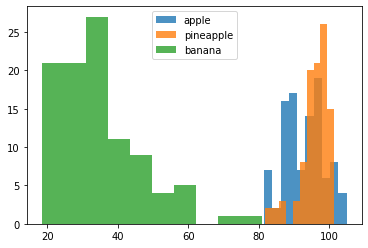

In [128]:
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

####Mean(Pixel)

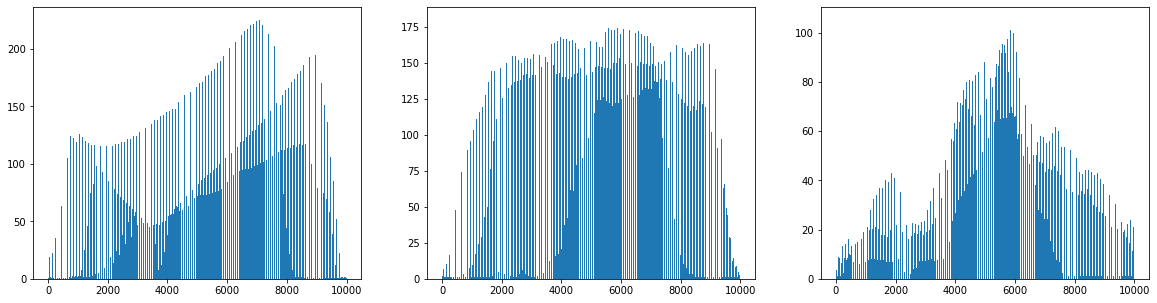

In [129]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

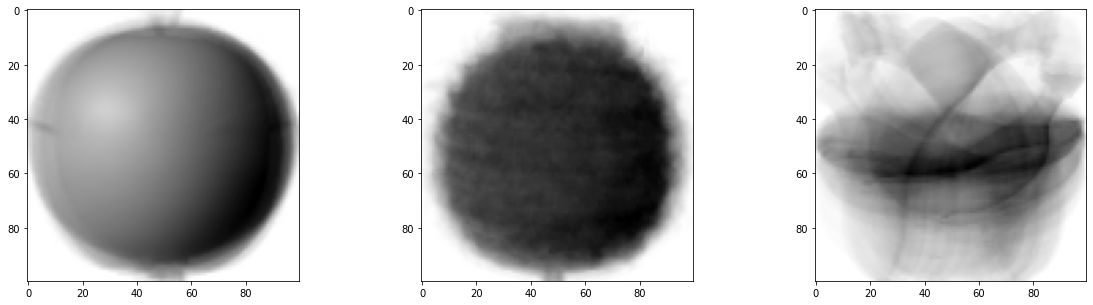

In [130]:
apple_mean=np.mean(apple,axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple,axis=0).reshape(100,100)
banana_mean=np.mean(banana,axis=0).reshape(100,100)

fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

###Pick Sample

In [131]:
apple_abs_diff=np.abs(fruits-apple_mean)
apple_abs_mean=np.mean(apple_abs_diff,axis=(1,2))
print(apple_abs_mean.shape)

(300,)


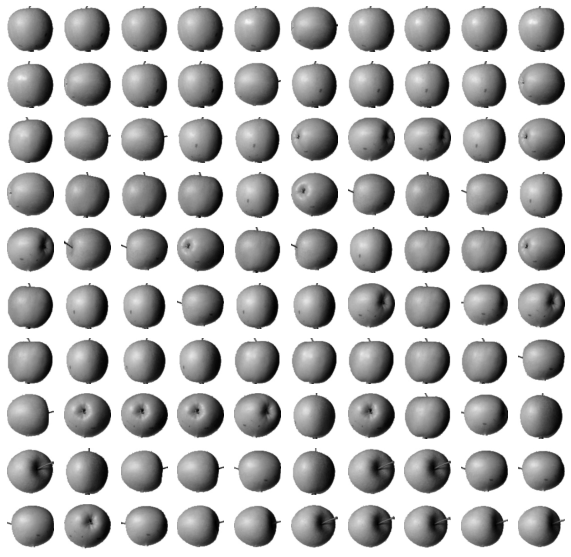

In [132]:
apple_index=np.argsort(apple_abs_mean)[:100]

fig,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[10*i+j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

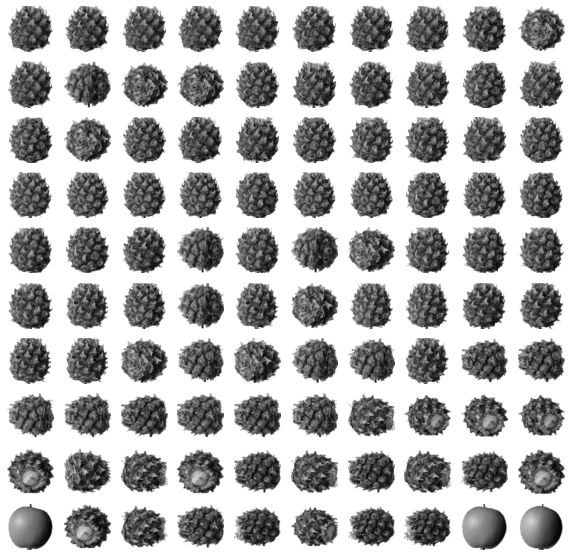

In [133]:
pineapple_abs_diff=np.abs(fruits-pineapple_mean)
pineapple_abs_mean=np.mean(pineapple_abs_diff,axis=(1,2))

pineapple_index=np.argsort(pineapple_abs_mean)[:100]

fig,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[pineapple_index[10*i+j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

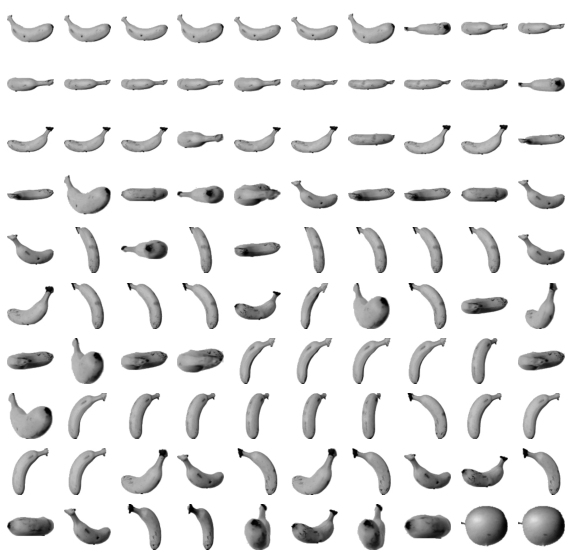

In [134]:
banana_abs_diff=np.abs(fruits-banana_mean)
banana_abs_mean=np.mean(banana_abs_diff,axis=(1,2))

banana_index=np.argsort(banana_abs_mean)[:100]

fig,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[banana_index[10*i+j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

##K-means

###Kmeans Class

In [135]:
fruits_2d=fruits.reshape(-1,100*100)

In [136]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_2d)

print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [137]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


####Result Image

In [138]:
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols=n if rows<2 else 10

  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if(i*10+j<n):
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()

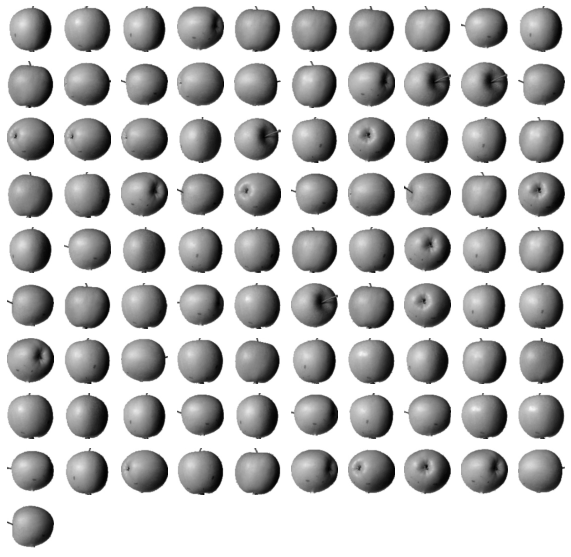

In [139]:
draw_fruits(fruits[km.labels_==0])

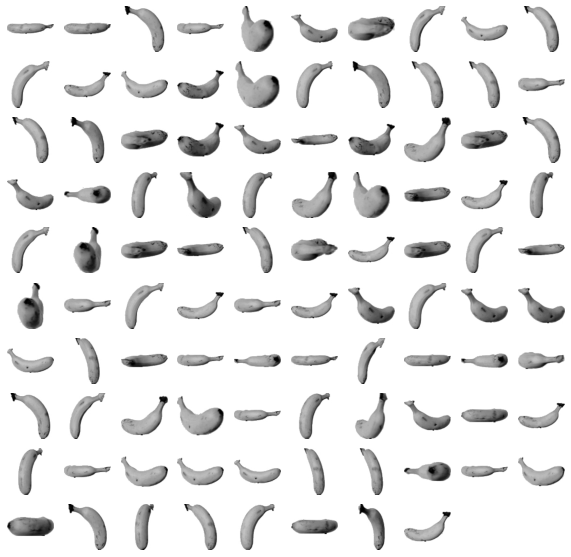

In [140]:
draw_fruits(fruits[km.labels_==1])

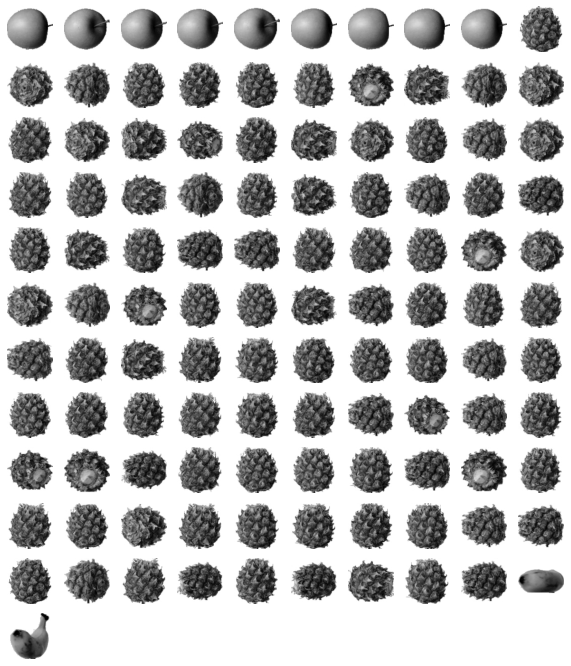

In [141]:
draw_fruits(fruits[km.labels_==2])

####Cluster Center

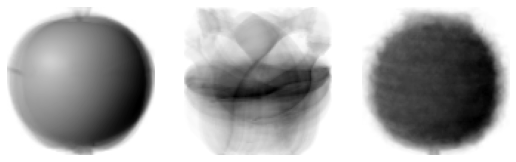

In [142]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [143]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [144]:
print(km.predict(fruits_2d[100:101]))

[2]


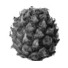

In [145]:
draw_fruits(fruits[100:101])

In [146]:
print(km.n_iter_)

3


###Elbow

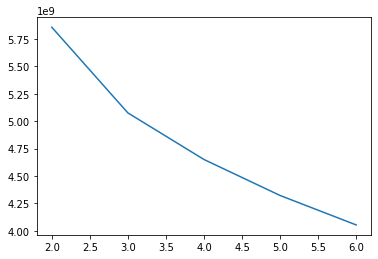

In [147]:
inertia=[]
for k in range(2,7):
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.show()

##Principal Component Analysis

###PCA Class

In [148]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


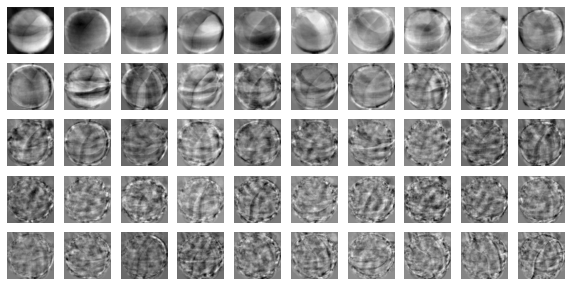

In [149]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [150]:
print(fruits_2d.shape)

fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [151]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


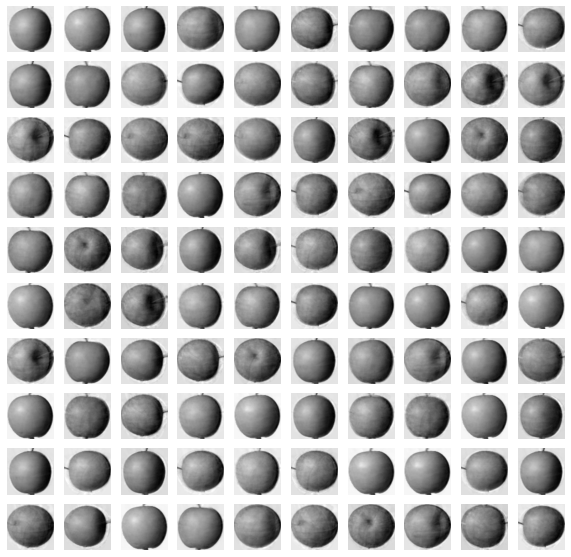

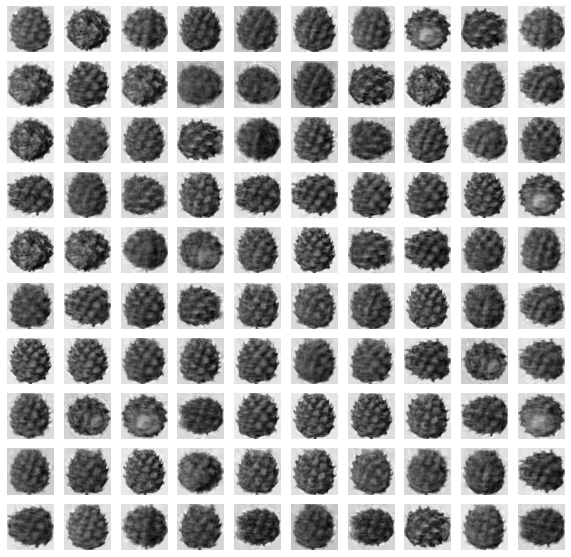

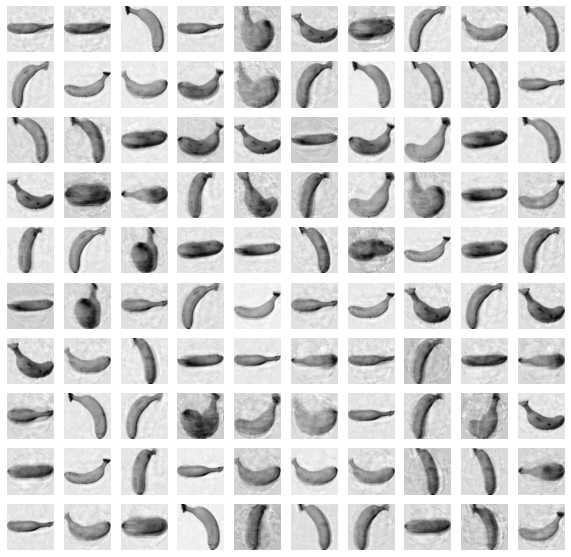

In [152]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

###Explained Variance

In [153]:
print(np.sum(pca.explained_variance_ratio_))

0.9214727548499012


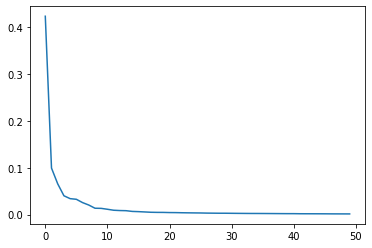

In [154]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

###LogisticRegression

In [155]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
target=np.array([0]*100+[1]*100+[2]*100)

In [158]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5774234771728515


In [159]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029974365234375


###n_components=2

In [160]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [161]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

(300, 2)
0.9933333333333334
0.04801340103149414


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [162]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


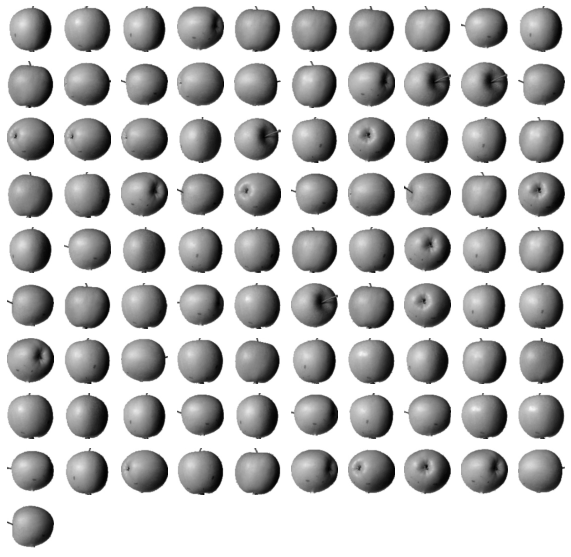

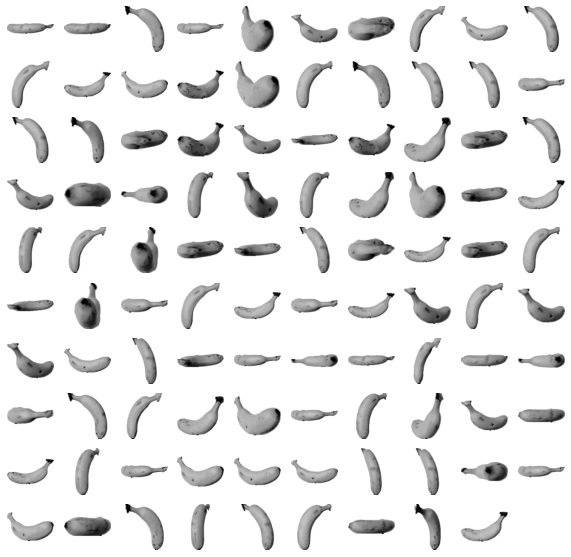

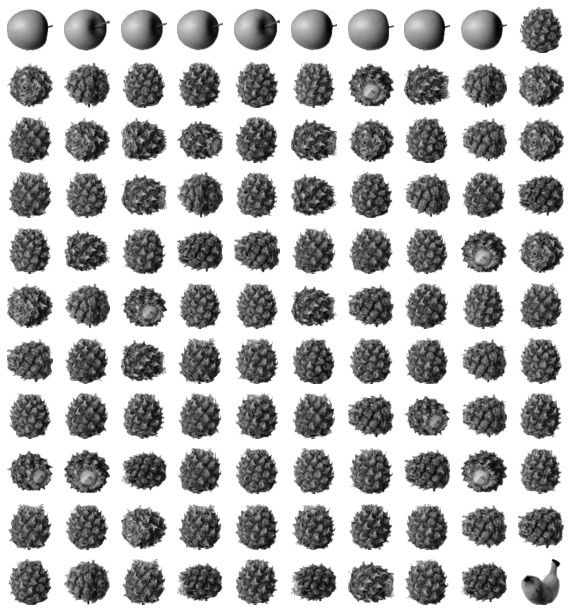

In [163]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

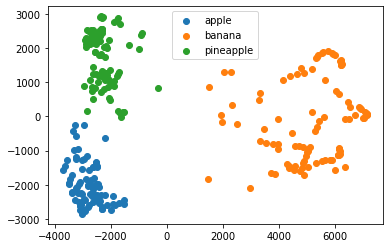

In [164]:
for label in range(0,3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()